In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import NoSuchElementException
import selenium.common.exceptions as sex

import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
import lxml

import time
from time import sleep
import random
import re

In [2]:
df = pd.read_csv('modoo_df.csv', index_col=0)
df = df.drop(df.index[4403])
print(df.shape)
df.head()

(6989, 4)


,hospital,adress,review_count,link
0,자생한방병원,서울강남구논현1동,64,https://www.modoodoc.com/hospital/17186/%EC%9E...
1,김민석한의원,서울마포구대흥동,29,https://www.modoodoc.com/hospital/14208/%EA%B9...
2,춘원,서울종로구종로1.2.3.4가동,31,https://www.modoodoc.com/hospital/17222/%EC%B6...
3,리봄한방병원,서울강남구논현2동,35,https://www.modoodoc.com/hospital/17166/%EB%A6...
4,부야한의원,경상북도청도군청도읍,28,https://www.modoodoc.com/hospital/64126/%EB%B6...


In [3]:
def str_to_int(x):
    x = int(x)
    return x

df['review_count'] = df['review_count'].apply(str_to_int)

In [4]:
count_list = df.review_count.tolist()
count_list[0]==int(64)

True

(array([6.527e+03, 3.410e+02, 8.800e+01, 1.400e+01, 1.000e+01, 5.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([ 0. ,  6.4, 12.8, 19.2, 25.6, 32. , 38.4, 44.8, 51.2, 57.6, 64. ]),
 <BarContainer object of 10 artists>)

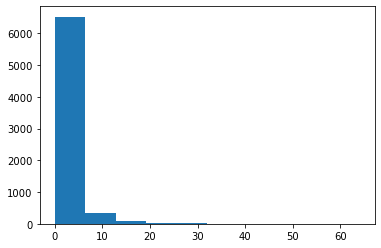

In [16]:
import matplotlib.pyplot as plt
plt.hist(df.review_count)

In [6]:
df.review_count.describe()

count    6989.000000
mean        2.602661
std         3.148345
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        64.000000
Name: review_count, dtype: float64

In [17]:
more_ten = df[df.review_count >10]
print(more_ten.shape)
more_ten.head()

(176, 4)


,hospital,adress,review_count,link
0,자생한방병원,서울강남구논현1동,64,https://www.modoodoc.com/hospital/17186/%EC%9E...
1,김민석한의원,서울마포구대흥동,29,https://www.modoodoc.com/hospital/14208/%EA%B9...
2,춘원,서울종로구종로1.2.3.4가동,31,https://www.modoodoc.com/hospital/17222/%EC%B6...
3,리봄한방병원,서울강남구논현2동,35,https://www.modoodoc.com/hospital/17166/%EB%A6...
4,부야한의원,경상북도청도군청도읍,28,https://www.modoodoc.com/hospital/64126/%EB%B6...


In [18]:
adress_list = df.adress.tolist()

In [19]:
def add_clean(x):
    if '서울'  in x:
        x='서울'
    elif '경기' in x:
        x = '경기'
    elif '경상북도' in x:
        x = '경상북도'
    elif '경상남도' in x:
        x = '경상남도'
    elif '대전' in x:
        x = '대전'
    elif '부산' in x:
        x = '부산'
    elif '기도' in x:
        x = '경기'
    elif '인천' in x:
        x = '인천'
    elif '라북'  in x:
        x='전라북도'
    elif '청남'  in x:
        x='충청남도'
    elif '대구'  in x:
        x='대구'
    elif '상북'  in x:
        x='경상북도'
    elif '라남'  in x:
        x='전라남도'
    elif '남북'  in x:
        x='경상남도'
    elif x[0] =='전':
        x='대전'
    elif x[0] =='산':
        x='울산'
    elif '충청북도'  in x:
        x='충청북도'
    elif '광주'  in x:
        x='광주'
    elif '상남'  in x:
        x='경상남도'
    elif '청북'  in x:
        x='충청북도'
    elif x[0] =='구':
        x='대구'
    elif '원도'  in x:
        x='강원도'    
    elif x[0] =='주':
        x='광주'
    elif x[0] =='종':
        x='세종'
    elif x[0] =='제':
        x='제주'
    elif x[0] =='울':
        x='서울'
    elif x[0] =='천':
        x='인천'

    return x

df['adr_clean'] = df['adress'].apply(add_clean)
df['adr_clean'].value_counts()

서울      2123
경기      1700
울산       497
대구       442
인천       415
경상남도     293
광주       277
대전       266
전라북도     181
경상북도     157
충청북도     143
충청남도     142
강원도      121
부산       101
전라남도      97
세종        33
제주         1
Name: adr_clean, dtype: int64

In [20]:
# df = df.drop(columns=['adress'], axis=0)
df = df.sort_values(by=['review_count'], ascending=False)
print(df.shape)
df = df[df['review_count']!=0]
print(df.shape)

(6989, 5)
(6823, 5)


In [22]:
seoul = df[df.adr_clean=='서울']
seoul.to_csv('seoul.csv')
print('seoul', seoul.shape)

kyung_buk = df[df.adr_clean=='경상북도']
kyung_buk.to_csv('seoul.csv')
print('kyung_buk', kyung_buk.shape)

kyung_nam = df[df.adr_clean=='경상남도']
kyung_nam.to_csv('kyung_nam.csv')
print('kyung_nam',kyung_nam.shape)

kyungki = df[df.adr_clean=='경기']
kyungki.to_csv('kyungki.csv')
print('kyungki', kyungki.shape)

kwangju = df[df.adr_clean=='광주']
kwangju.to_csv('seokwangjuul.csv')
print('kwangju', kwangju.shape)

daegu = df[df.adr_clean=='대구']
daegu.to_csv('daegu.csv')
print('daegu', daegu.shape)

jeon_buk = df[df.adr_clean=='전라북도']
jeon_buk.to_csv('jeon_buk.csv')
print('jeon_buk', jeon_buk.shape)

jeon_nam = df[df.adr_clean=='전라남도']
jeon_nam.to_csv('jeon_nam.csv')
print('jeon_nam', jeon_nam.shape)

chung_buk = df[df.adr_clean=='충청북도']
chung_buk.to_csv('chung_buk.csv')
print('chung_buk', chung_buk.shape)

chung_nam = df[df.adr_clean=='충청남도']
chung_nam.to_csv('chung_nam.csv')
print('chung_nam', chung_nam.shape)

jeaju = df[df.adr_clean=='제주']
jeaju.to_csv('jeaju.csv')
print('jeaju', jeaju.shape)

ulsan = df[df.adr_clean=='울산']
ulsan.to_csv('ulsan.csv')
print('ulsan', ulsan.shape)

busan = df[df.adr_clean=='부산']
busan.to_csv('busan.csv')
print('busan', busan.shape)

kangwon = df[df.adr_clean=='강원도']
kangwon.to_csv('kangwon.csv')
print('kangwon', kangwon.shape)

daejun = df[df.adr_clean=='대전']
daejun.to_csv('daejun.csv')
print('daejun', daejun.shape)

inchon = df[df.adr_clean=='인천']
inchon.to_csv('inchon.csv')
print('inchon', inchon.shape)

saejong = df[df.adr_clean=='세종']
saejong.to_csv('saejong.csv')
print('saejong', saejong.shape)

seoul (2089, 5)
kyung_buk (152, 5)
kyung_nam (281, 5)
kyungki (1672, 5)
kwangju (270, 5)
daegu (428, 5)
jeon_buk (171, 5)
jeon_nam (96, 5)
chung_buk (140, 5)
chung_nam (132, 5)
jeaju (1, 5)
ulsan (471, 5)
busan (95, 5)
kangwon (117, 5)
daejun (265, 5)
inchon (410, 5)
saejong (33, 5)
